In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as d

In [56]:
(x, y) = d.make_moons(200, noise=0.15)

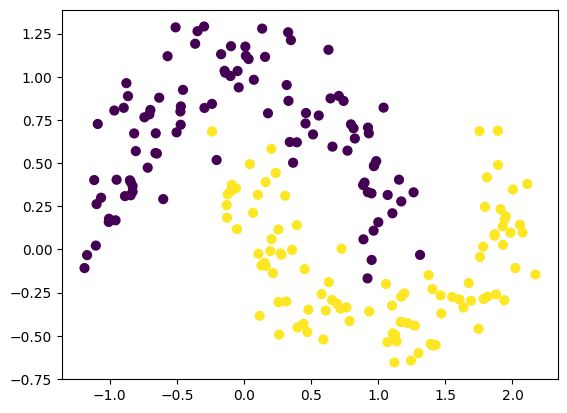

In [57]:
plt.scatter(x[:, 0], x[:, 1], s=40, c=y);

In [58]:
x.shape, y.shape

((200, 2), (200,))

In [59]:
input_neurons = 2
output_neurons = 2
samples = len(x)
learning_rate = 0.001
lam = 0.01

In [60]:
# model_dic = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
def retreive(model_dict):
  W1 = model_dict['W1']
  b1 = model_dict['b1']
  W2 = model_dict['W2']
  b2 = model_dict['b2']
  return W1, b1, W2, b2



In [61]:
def forward(x, model_dict):
  W1, b1, W2, b2 = retreive(model_dict)
  z1 = x.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  a2 = np.tanh(z2)
  exp_scores = np.exp(a2)
  softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  return z1, a1, softmax

In [62]:
def loss(softmax, y, model_dict):
  W1, b1, W2, b2 = retreive(model_dict)
  m = np.zeros(200)
  for i, crct_ind in enumerate(y):
    pred = softmax[i][crct_ind]
    m[i] = pred
  log_prob = -np.log(pred)
  softmax_loss = np.sum(log_prob)
  reg_loss = lam / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
  loss = softmax_loss + reg_loss
  return float(loss / y.shape[0])



In [63]:
def predict(x, model_dict):
  W1, b1, W2, b2 = retreive(model_dict)
  z1 = x.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  a2 = np.tanh(z2)
  exp_scores = np.exp(a2)
  softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  return np.argmax(softmax, axis=1)

In [76]:
def backpropagation(x, y, model_dict, epochs):
  for i in range(epochs):
    W1, b1, W2, b2 = retreive(model_dict)
    z1, a1, probs = forward(x, model_dict)
    delta3 = np.copy(probs)
    delta3[range(x.shape[0]), y] -= 1 # delta3 is probs-1 of (200, 2)
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True) #(1, 2)
    delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
    dW1 = np.dot(x.T, delta2)
    db1 = np.sum(delta2, axis=0)
    dW2 += lam * np.sum(W2)
    dW1 += lam * np.sum(W1)
    # update weights
    W1 += -learning_rate * dW1
    b1 += -learning_rate * db1
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2
    # update the model dict
    model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    # print loss
    if (i+1) % 50 == 0:
      print('Loss at epoch {} is {:.3f}'.format(i+1, loss(probs, y, model_dict)))

  return model_dict


In [77]:
# Initializing the network
# Xavier initialization divide weight metrics by square root of input dimension

def init_network(input_dim, hidden_dim, output_dim):
  model = {}
  W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
  b1 = np.zeros((1, hidden_dim))
  W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(input_dim)
  b2 = np.zeros((1, output_dim))
  model['W1'] = W1
  model['b1'] = b1
  model['W2'] = W2
  model['b2'] = b2
  return model




In [78]:
model_dict = init_network(input_dim=input_neurons, hidden_dim=3, output_dim=output_neurons)
model = backpropagation(x, y, model_dict, 1500)

Loss at epoch 50 is 0.004
Loss at epoch 100 is 0.004
Loss at epoch 150 is 0.004
Loss at epoch 200 is 0.004
Loss at epoch 250 is 0.004
Loss at epoch 300 is 0.004
Loss at epoch 350 is 0.005
Loss at epoch 400 is 0.005
Loss at epoch 450 is 0.006
Loss at epoch 500 is 0.007
Loss at epoch 550 is 0.007
Loss at epoch 600 is 0.008
Loss at epoch 650 is 0.009
Loss at epoch 700 is 0.009
Loss at epoch 750 is 0.010
Loss at epoch 800 is 0.011
Loss at epoch 850 is 0.012
Loss at epoch 900 is 0.013
Loss at epoch 950 is 0.014
Loss at epoch 1000 is 0.015
Loss at epoch 1050 is 0.016
Loss at epoch 1100 is 0.018
Loss at epoch 1150 is 0.019
Loss at epoch 1200 is 0.020
Loss at epoch 1250 is 0.022
Loss at epoch 1300 is 0.024
Loss at epoch 1350 is 0.025
Loss at epoch 1400 is 0.027
Loss at epoch 1450 is 0.029
Loss at epoch 1500 is 0.031
